# Let's Add Time Dimension - An Introduction to _Video Analysis_

A video is a sequence of images played at a fast enough rate to make our eyes feel that the objects/scene is actually in motion (thanks to persistence of vision). 

But that's more of an observer's definition. What is a video for an analyst. Well video analysis brings with it a whole new dimension to work with and that dimension is **TIME**.

<br/>

<figure>
    <img src="https://i.gifer.com/g2Oe.gif" width = 700px/>
    <figcaption style = "text-align:center">We all can Hear Dr. Strange saying "and Time". Ref: 
        <a href="https://gifer.com/en/g2Oe">Gifer.com</a>
    </figcaption>
</figure>

<br/>

Let's look at how these images are put together and how can we analyze them using OpenCV and Python.

## Spatio-Temporal Redundancies in Frame Sequence

Let's see how we can exploit the **spatial and temporal redundancies** in a seris of frames to save storage space when encoding them. Below is a demonstration of the spatial and temporal redundancies present in the time stone GIF shown above.

In [1]:
import cv2
import imageio
import matplotlib.pyplot as plt

## Read the gif from disk to `RGB`s using `imageio.miread` 
gif = imageio.mimread('..//assets//stock//time_stone.gif')
nums = len(gif)
print("Total {} frames in the gif!".format(nums))

gif = [cv2.cvtColor(fr, cv2.COLOR_RGB2GRAY) for fr in gif]

Total 24 frames in the gif!


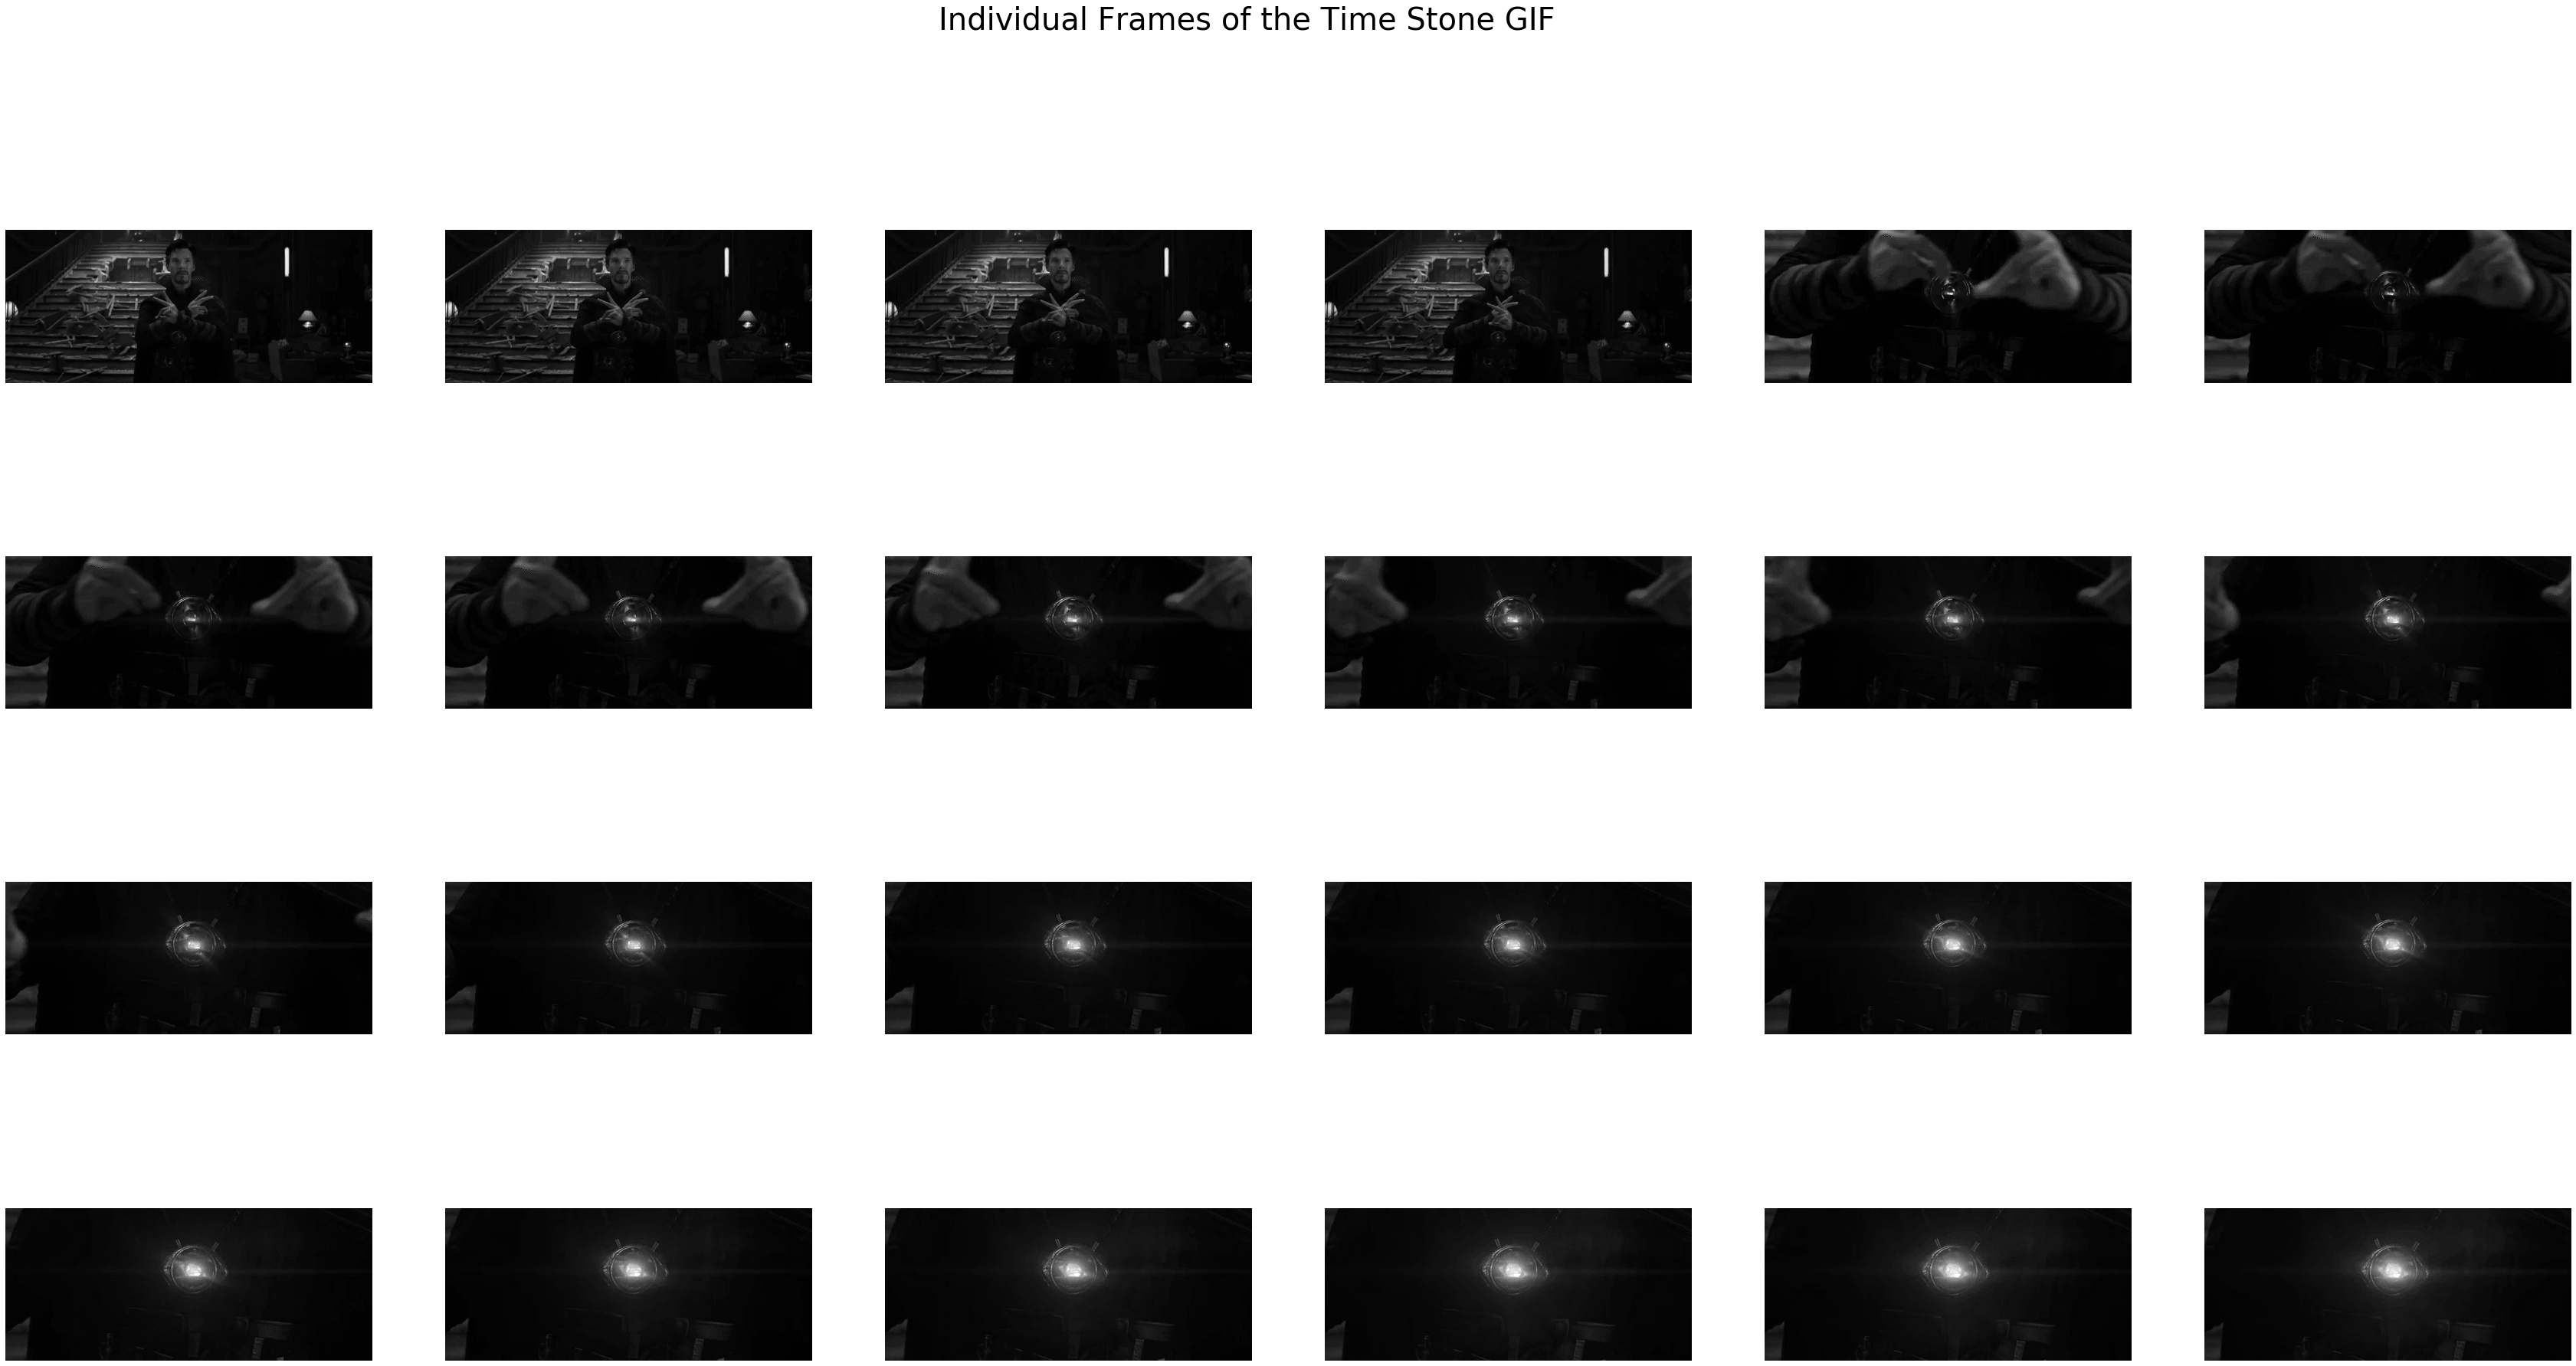

In [2]:
# Plotting frames in a 4X6 grid

f, ax = plt.subplots(4, 6, figsize = (60, 30))
for i in range(4):
    for j in range(6):
        ax[i][j].imshow(gif[6*i+j], cmap = 'gray')
        ax[i][j].axis('off')
f.suptitle('Individual Frames of the Time Stone GIF', fontsize = 40)
plt.show()

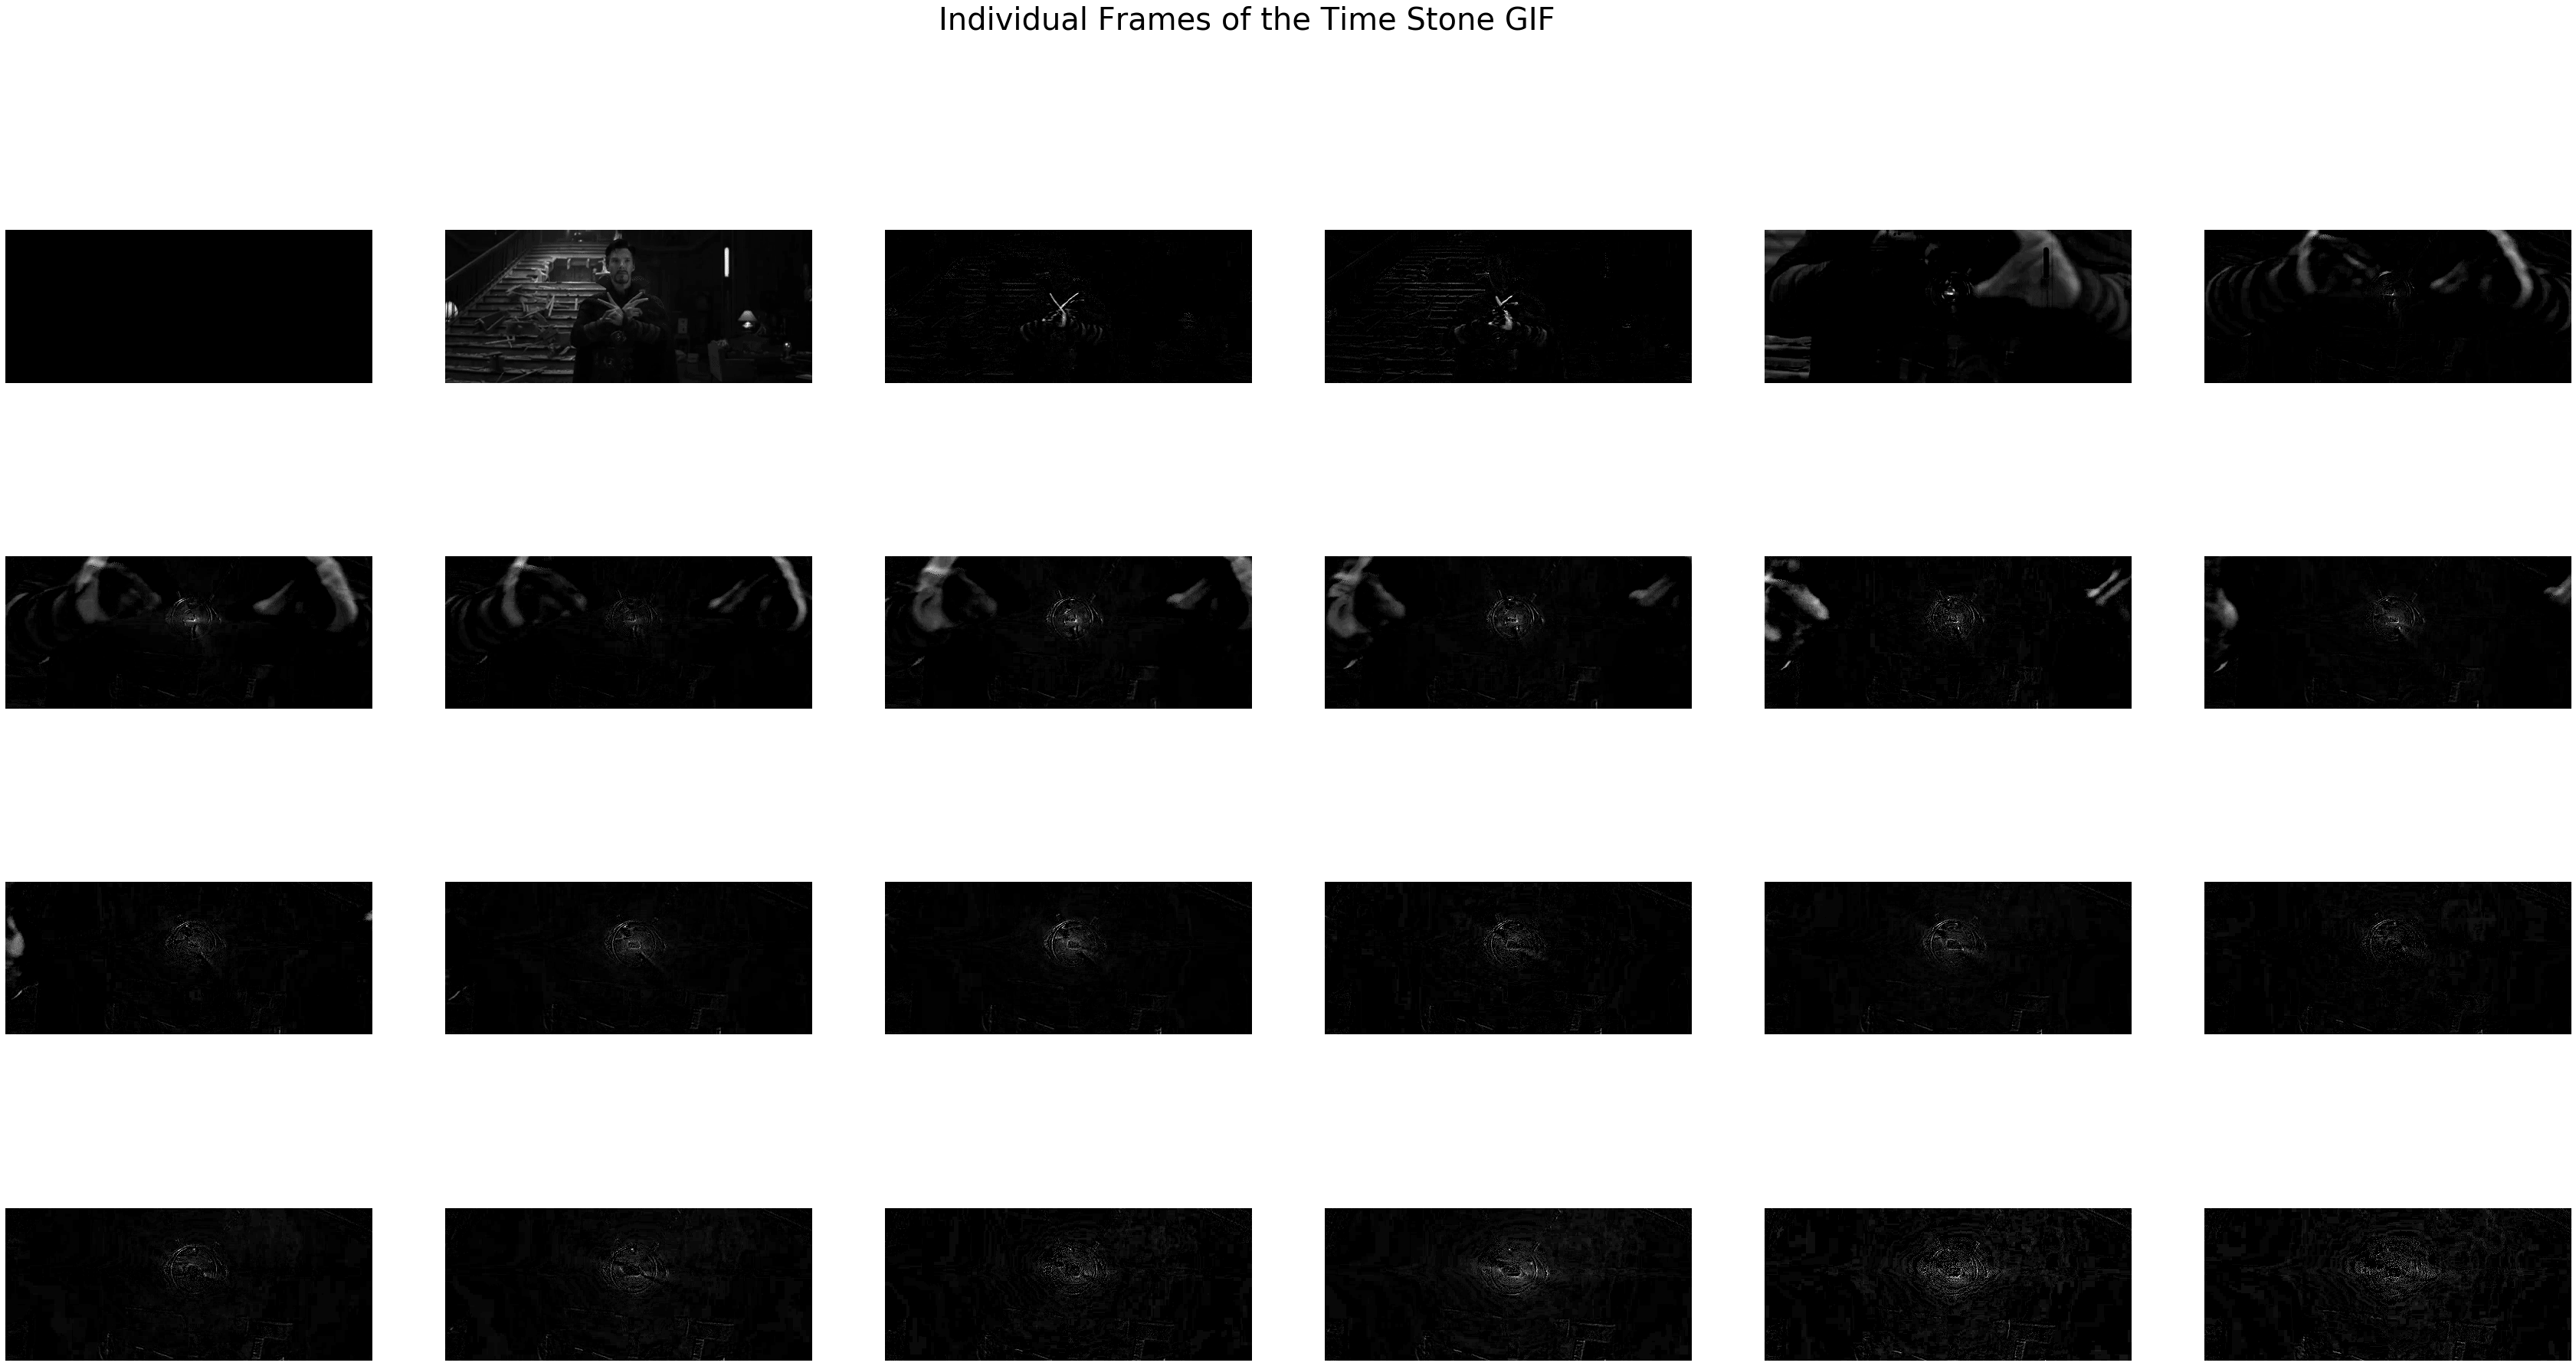

In [3]:
# Plotting the difference of consecutive frames in 4X6 grid

f, ax = plt.subplots(4, 6, figsize = (60, 30))
prev_frame = gif[0]
diff = gif[0]
for i in range(4):
    for j in range(6):
        diff[:, :] = cv2.subtract(gif[6*i+j][:, :], prev_frame[:, :])
        ax[i][j].imshow(diff, cmap = 'gray')
        ax[i][j].axis('off')
        prev_frame = gif[6*i+j]
f.suptitle('Individual Frames of the Time Stone GIF', fontsize = 40)
plt.show()

The above plot shows that in a sequence of images, only a fraction of pixels are different between two consequent frames. This property is important with respect to storing sequence of frames on disk. **Motion picture encoding algirthms like mpeg exploit this property of spatial and temporal redudancy between frames to create a compact representation of the set of frames**. This is the essence of storing movies on disk. 

## Target Problems in Video Analysis

With time also comes motion. This motion is unique property of movies as we can only see motion when we have more than one image or a sequence of images. Thus estimating or tracking motion becomes a very important problem in video analysis. Following are some of the interesting problems which can be tackled using videos:

<br/>

<figure>
    <img src="https://pyimagesearch.com/wp-content/uploads/2015/09/ball-tracking-animated-02.gif" width = 300px/>
    <figcaption style = "text-align:center">Motion tracking. Ref: 
        <a href="https://www.pyimagesearch.com/2015/09/14/ball-tracking-with-opencv/">PyImageSearch</a>
    </figcaption>
</figure>

<br/>

- Motion/Trajectory prediction

<br/>

<figure>
    <img src="https://1.bp.blogspot.com/-ym8EfnQKlqM/XVrTPqWUqsI/AAAAAAAAEh0/GfCY8BW28SgTqYO0gd230YgbwGgxc7yfgCLcBGAs/s320/image3.gif" width = 300px/>
    <figcaption style = "text-align:center">Hand Gesture Recognition using Tensorflow JS. Ref: 
        <a href="https://ai.googleblog.com/2019/08/on-device-real-time-hand-tracking-with.html">Google AI Blog</a>
    </figcaption>
</figure>

<br/>

<p><a href="https://www.pyimagesearch.com/2019/07/15/video-classification-with-keras-and-deep-learning/?wvideo=ltsc88xl01"><img src="https://embedwistia-a.akamaihd.net/deliveries/8dadf12c6bc87294f70c6f1d5d35ea5a.jpg?wistia-ltsc88xl01-1-ltsc88xl01-video-thumbnail=1&amp;wistia-ltsc88xl01-2-ltsc88xl01-video-thumbnail=1&amp;image_play_button_size=2x&amp;image_crop_resized=640x404&amp;image_play_button=1&amp;image_play_button_color=54bbffe0" width="400" height="252.5" style="width: 400px; height: 252.5px;"></a></p><p><a href="https://www.pyimagesearch.com/2019/07/15/video-classification-with-keras-and-deep-learning/?wvideo=ltsc88xl01">Video classification with Keras and Deep Learning - PyImageSearch</a></p>

- Activity classification
- Unusual behavior prediction
- Neural Sign Language Translation

The problems shown above are but a fraction of possible challenges the computer vision community faces today. To be able to tackle these problems headon, we first need to learn how to handle video files in Python, what are some basic properties of videos and how to do some basic manipulations on them. **Sounds Familiar**.

<br/>

<figure>
    <img src="https://em.wattpad.com/3864dcd0e4187358c7da5f7052a48b55fd7559a3/68747470733a2f2f73332e616d617a6f6e6177732e636f6d2f776174747061642d6d656469612d736572766963652f53746f7279496d6167652f50436c55727973577732683131513d3d2d3736333430343031302e313562346566373266353664326263353636393431333938353337372e676966?s=fit&w=720&h=720" width = 500px/>
    <figcaption style = "text-align:center">Feels Like DejaVu from Chapter 1. Ref: 
        <a href="https://www.wattpad.com/763404010-avengers-marvel-one-shots-%2B-gifs-gif%E2%84%A2-%E2%9C%93-stephen">Marvel One Shot GIF</a>
    </figcaption>
</figure>

<br/>

## Importing Videos in OpenCV

OpenCV provides a class **VideoCapture** which can be used to read, write and visualize video files in Python. This class also provides some properties of the video as class object attributes. Let's look at how to use VideoCapture. Read [Reading Videos using OpenCV](https://docs.opencv.org/2.4/modules/highgui/doc/reading_and_writing_images_and_video.html#videocapture-videocapture) for details on the class methods and attributes.

In [4]:
# Importing Libraries

import cv2
import matplotlib.pyplot as plt

In [5]:
# Reading video file in OpenCV

vs = cv2.VideoCapture('..//assets//stock//time_stone.gif')

## Properties of Videos in OpenCV

In [6]:
# Video File Properties. Some of the properties of the GIF image obtained using get method.

print('Total Number of Frames {}'.format(vs.get(cv2.CAP_PROP_FRAME_COUNT)))
print('Frames Per Second {}'.format(vs.get(cv2.CAP_PROP_FPS)))
print('Frame Dimensions Width = {}, Height = {}'.format(vs.get(cv2.CAP_PROP_FRAME_WIDTH), vs.get(cv2.CAP_PROP_FRAME_HEIGHT)))

Total Number of Frames 24.0
Frames Per Second 15.083333333333334
Frame Dimensions Width = 480.0, Height = 200.0


In [7]:
# Code Ref: https://www.learnopencv.com/read-write-and-display-a-video-using-opencv-cpp-python/

import cv2
import numpy as np

# Create a VideoCapture object and read from input file
# If the input is the camera, pass 0 instead of the video file name
cap = cv2.VideoCapture('..//assets//videos//chai.mp4')

# Check if camera opened successfully
if (cap.isOpened() == False): 
    print("Error opening video stream or file")

# Read until video is completed
while(cap.isOpened()):
    # Capture frame-by-frame
    ret, frame = cap.read()
    if ret == True:
        # Display the resulting frame
        cv2.imshow('Frame',frame)

        # Press Q on keyboard to  exit
        if cv2.waitKey(int(1000/cap.get(cv2.CAP_PROP_FPS))) & 0xFF == ord('q'):
            break
    # Break the loop
    else: 
        break

# When everything done, release the video capture object
cap.release()

# Closes all the frames
cv2.destroyAllWindows()

## Basic Frame Manipulation

In [8]:
# Let's put this into a function and do some trivial changes to the frames of the video

def displayVideo(file_path, process = None, fps = None):
    
    cap = cv2.VideoCapture(file_path)

    if (cap.isOpened() == False): 
        print("Error opening video stream or file")

    while(cap.isOpened()):
        ret, frame = cap.read()
        if ret == True:
            if process is None:
                cv2.imshow('Frame', frame)
            else:
                cv2.imshow('Frame', process(frame))
            
            if fps is None:
                fps = cap.get(cv2.CAP_PROP_FPS)
            
            if cv2.waitKey(int(1000/fps)) & 0xFF == ord('q'):
                break
        else: 
            break

    cap.release()
    cv2.destroyAllWindows()
    
# Defining frame manipulation logic
    
grayscale = lambda x: cv2.cvtColor(x, cv2.COLOR_RGB2GRAY)
bgr = lambda x: cv2.cvtColor(x, cv2.COLOR_RGB2BGR)
hsv = lambda x: cv2.cvtColor(x, cv2.COLOR_RGB2HSV)
upsidedown = lambda x: cv2.flip(x, 0)

In [10]:
chai_path = '..//assets//videos//chai.mp4'
displayVideo(chai_path, grayscale, 10)

In [11]:
# a function to see only changing portions of the frames

def diffVideo(file_path, fps = None):
    
    cap = cv2.VideoCapture(file_path)

    if (cap.isOpened() == False): 
        print("Error opening video stream or file")
    
    _, prev_frame = cap.read()
    
    while(cap.isOpened()):
        ret, frame = cap.read()
        if ret == True:
            cv2.imshow('Frame', cv2.subtract(frame, prev_frame))
            prev_frame = frame
        
            if fps is None:
                fps = cap.get(cv2.CAP_PROP_FPS)
            
            if cv2.waitKey(int(1000/fps)) & 0xFF == ord('q'):
                break
        else: 
            break

    cap.release()
    cv2.destroyAllWindows()

In [12]:
diffVideo(chai_path, 60)

In [13]:
time_stone = '..//assets//stock//time_stone.gif'
diffVideo(time_stone, fps = 5)

## Let's Solve A Sample Problem To Understand Video Analysis Better